In [1]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
import pandas as pd
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("boston_housing.csv")

### Analyse et Nettoyage

    CRIM - Taux de criminalité par habitant par ville
    ZN - Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
    INDUS - Proportion d'acres de terrains non commerciaux par ville.
    CHAS - Variable fictive pour la rivière Charles (1 si le terrain borde la rivière, 0 sinon)
    NOX - Concentration d'oxydes d'azote (en parties par 10 millions)
    RM - Nombre moyen de pièces par logement
    AGE - Proportion d'unités occupées par leur propriétaire construites avant 1940
    DIS - Distances pondérées vers les cinq centres d'emploi de Boston
    RAD - Indice d'accessibilité aux autoroutes radiales
    TAX - Taux d'imposition foncière pleine valeur par tranche de 10 000 dollars
    PTRATIO - Ratio élève-enseignant par ville
    B - 1000(Bk - 0.63)^2 où Bk est la proportion de personnes noires par ville
    LSTAT - % de la population de statut inférieur
    MEDV - Valeur médiane des logements occupés par leur propriétaire en milliers de dollars
    La variable n°14 semble être censurée à 50,00 (correspondant à un prix médian de 50 000 $). La censure est suggérée par le fait que le prix médian le plus élevé, exactement 50 000 $, est rapporté dans 16 cas, tandis que 15 cas ont des prix compris entre 40 000 $ et 50 000 $, avec des prix arrondis au cent le plus proche. Harrison et Rubinfeld ne mentionnent aucune censure.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.6 KB


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       1
NOX        1
RM         1
AGE        1
DIS        1
RAD        1
TAX        1
PTRATIO    1
B          2
LSTAT      2
MEDV       2
dtype: int64

In [5]:
df = df.dropna()


In [6]:
cor = df.corr()
cor['MEDV'].sort_values(ascending=False)

MEDV       1.000000
B          0.463322
LSTAT      0.460100
RM         0.380955
ZN         0.347935
CHAS       0.289394
TAX        0.261724
DIS        0.188918
AGE       -0.122570
CRIM      -0.177274
PTRATIO   -0.232561
RAD       -0.355116
NOX       -0.391713
INDUS     -0.492149
Name: MEDV, dtype: float64

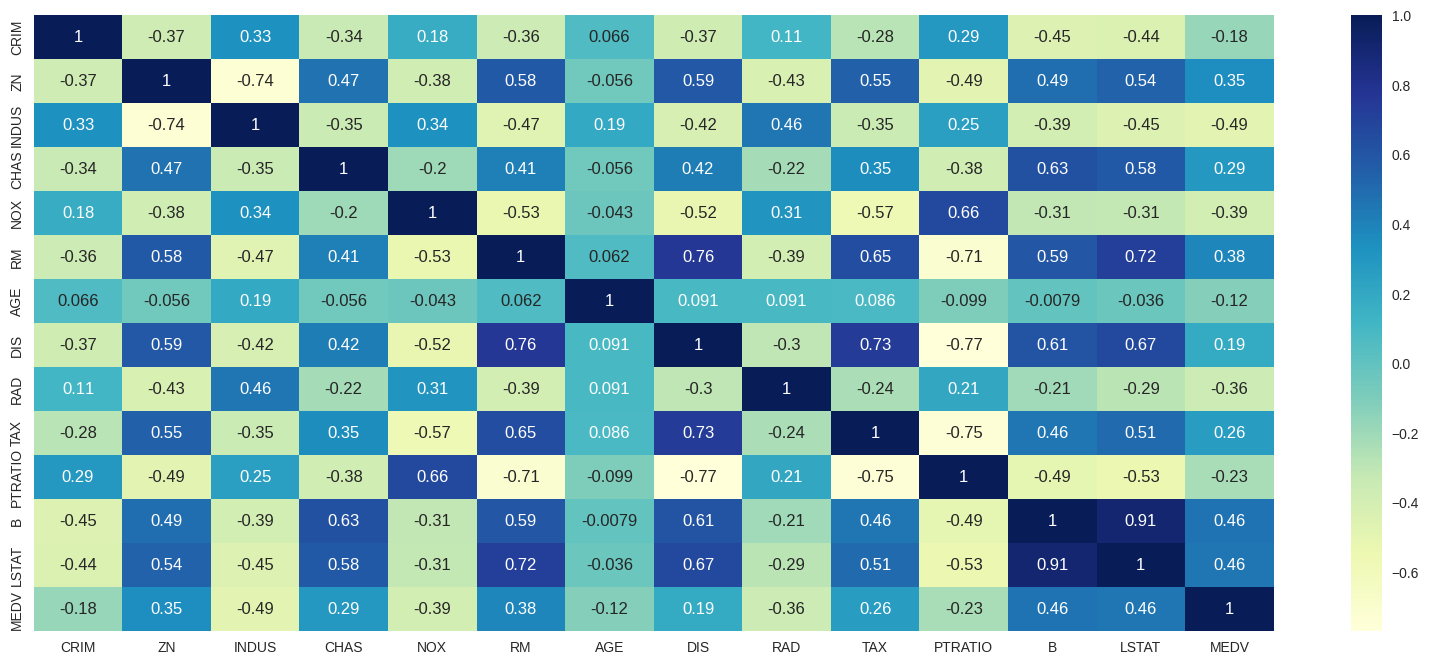

In [7]:
plt.figure(figsize=(20, 8))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

### Pycaret

In [8]:
reg = RegressionExperiment()
reg = setup(df, target='MEDV')

,Description,Value
0,Session id,981
1,Target,MEDV
2,Target type,Regression
3,Original data shape,"(505, 14)"
4,Transformed data shape,"(505, 14)"
5,Transformed train set shape,"(353, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3018,0.2505,0.5005,0.9342,0.0281,0.0176
1,0.3436,0.2898,0.5383,0.8673,0.0287,0.0193
2,0.4832,1.0508,1.0251,0.8298,0.0537,0.0280
3,0.3027,0.1773,0.4210,0.9524,0.0214,0.0164
4,0.4583,0.7447,0.8630,0.8375,0.0493,0.0277
5,0.5077,0.8019,0.8955,0.8194,0.0516,0.0295
6,0.5541,0.8973,0.9473,0.8339,0.0584,0.0356
7,0.3384,0.3323,0.5765,0.9240,0.0296,0.0187
8,0.3568,0.3024,0.5499,0.9310,0.0313,0.0216


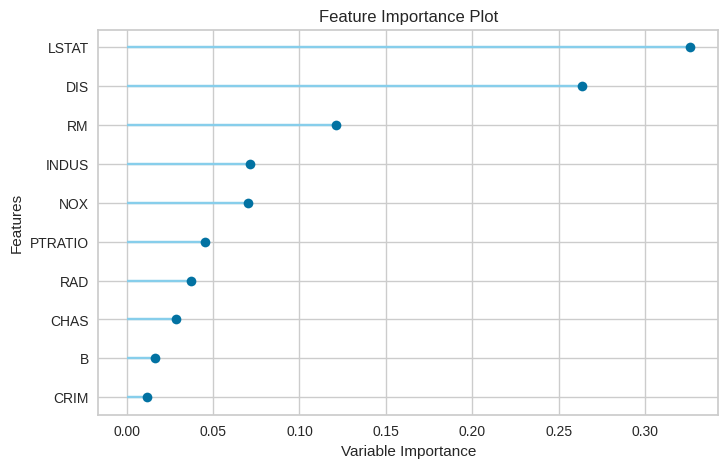

In [10]:
gbr_model = create_model('gbr')

plot_model(gbr_model, plot='feature')


In [11]:
best = reg.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [12]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:35:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [13]:
reg.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
reg.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3842,0.3909,0.6252,0.9233,0.0347,0.0222


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,prediction_label
328,396.899994,12.790000,22.200001,0.06617,0.0,3.240000,0.0,0.4600,5.868,25.799999,5.2146,4.0,430.0,16.900000,17.236961
106,394.049988,16.469999,19.500000,0.17120,0.0,8.560000,0.0,0.5200,5.836,91.900002,2.2110,5.0,384.0,20.900000,20.636975
64,395.579987,9.500000,25.000000,0.01951,17.5,1.380000,0.0,0.4161,7.104,59.500000,9.2229,3.0,216.0,18.600000,18.497708
188,393.869995,6.680000,32.000000,0.12579,45.0,3.440000,0.0,0.4370,6.556,29.100000,4.5667,5.0,398.0,15.200000,16.628037
208,389.429993,18.059999,22.500000,0.13587,0.0,10.590000,1.0,0.4890,6.064,59.099998,4.2392,4.0,277.0,18.600000,18.369735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,395.279999,7.010000,25.000000,2.81838,0.0,18.100000,0.0,0.5320,5.762,40.299999,4.0983,24.0,666.0,20.200001,20.399614
127,359.290009,27.260000,15.700000,0.25915,0.0,21.889999,0.0,0.6240,5.693,96.000000,1.7883,4.0,437.0,21.200001,21.135457
115,388.739990,10.450000,18.500000,0.17134,0.0,10.010000,0.0,0.5470,5.928,88.199997,2.4631,6.0,432.0,17.799999,18.158940
336,396.899994,8.010000,21.100000,0.03427,0.0,5.190000,0.0,0.5150,5.869,46.299999,5.2311,5.0,224.0,20.200001,20.464578


### OPTUNA

In [15]:
y = df['MEDV']
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
        'loss': trial.suggest_categorical('loss', ['quantile', 'absolute_error', 'squared_error', 'huber']),
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'friedman_mse']),
        'min_weight_fraction_leaf': trial.suggest_uniform('min_weight_fraction_leaf', 0.0, 0.5),
        'min_impurity_decrease': trial.suggest_uniform('min_impurity_decrease', 0.0, 0.5),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'tol': trial.suggest_loguniform('tol', 1e-6, 1e-3),
        'alpha': trial.suggest_uniform('alpha', 0.0, 1.0),
        'ccp_alpha': trial.suggest_uniform('ccp_alpha', 0.0, 0.5),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
        'warm_start': trial.suggest_categorical('warm_start', [False, True]),
        'validation_fraction': trial.suggest_uniform('validation_fraction', 0.1, 0.3),
        'n_iter_no_change': trial.suggest_categorical('n_iter_no_change', [None])
    }
    
    model = GradientBoostingRegressor(random_state=6630, **params)  
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    return r2

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_score = study.best_value

print(f"Score: {best_score.__round__(3)}")
print(f"Patametres: {best_params}")


[I 2023-06-12 14:36:09,750] A new study created in memory with name: no-name-70bf1e1d-751c-4f06-b5ad-86969e68e3e3
[I 2023-06-12 14:36:09,893] Trial 0 finished with value: 0.3779913959383209 and parameters: {'learning_rate': 0.043284502212938815, 'n_estimators': 193, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'log2', 'loss': 'squared_error', 'criterion': 'squared_error', 'min_weight_fraction_leaf': 0.09170225492671691, 'min_impurity_decrease': 0.15212112147976886, 'subsample': 0.5722807884690141, 'tol': 1.9762189340280066e-05, 'alpha': 0.2912291401980419, 'ccp_alpha': 0.30592644736118974, 'max_leaf_nodes': 15, 'warm_start': True, 'validation_fraction': 0.19121399684340717, 'n_iter_no_change': None}. Best is trial 0 with value: 0.3779913959383209.
[I 2023-06-12 14:36:09,984] Trial 1 finished with value: -1.249655345384845 and parameters: {'learning_rate': 0.21576967455896826, 'n_estimators': 80, 'max_depth': 6, 'min_samples_split': 13, 'min_samples_le

Score: 0.938
Patametres: {'learning_rate': 0.1686576899743209, 'n_estimators': 171, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'loss': 'squared_error', 'criterion': 'friedman_mse', 'min_weight_fraction_leaf': 0.011861570397387364, 'min_impurity_decrease': 0.13654394602977765, 'subsample': 0.665987378735627, 'tol': 0.0003543952502746326, 'alpha': 0.4247261297362468, 'ccp_alpha': 0.00018558613459542482, 'max_leaf_nodes': 8, 'warm_start': True, 'validation_fraction': 0.21365782310769843, 'n_iter_no_change': None}


- Score: 0.938
- Patametres: {'learning_rate': 0.1686576899743209, 'n_estimators': 171, 'max_depth': 6, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'loss': 'squared_error', 'criterion': 'friedman_mse', 'min_weight_fraction_leaf': 0.011861570397387364, 'min_impurity_decrease': 0.13654394602977765, 'subsample': 0.665987378735627, 'tol': 0.0003543952502746326, 'alpha': 0.4247261297362468, 'ccp_alpha': 0.00018558613459542482, 'max_leaf_nodes': 8, 'warm_start': True, 'validation_fraction': 0.21365782310769843, 'n_iter_no_change': None}


### Model

In [16]:
y = df['MEDV']
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', GradientBoostingRegressor(
        learning_rate=0.1686576899743209,
        n_estimators=171,
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=1,
        max_features=None,
        loss='squared_error',
        criterion='friedman_mse',
        min_weight_fraction_leaf=0.011861570397387364,
        min_impurity_decrease=0.13654394602977765,
        subsample=0.665987378735627,
        tol=0.0003543952502746326,
        alpha=0.4247261297362468,
        ccp_alpha=0.00018558613459542482,
        max_leaf_nodes=8,
        warm_start=True,
        validation_fraction=0.21365782310769843,
        n_iter_no_change=None,
        random_state=6630
    ))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)

print(f"Score: {score.round(3)}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse.round(3)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae.round(3)}")


Score: 0.938
MSE: 0.199
MAE: 0.27


In [17]:
y = df['MEDV']
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', GradientBoostingRegressor(
        learning_rate=0.1686576899743209,
        n_estimators=171,
        max_depth=6,
        min_samples_split=20,
        min_samples_leaf=1,
        max_features=None,
        loss='squared_error',
        criterion='friedman_mse',
        min_weight_fraction_leaf=0.011861570397387364,
        min_impurity_decrease=0.13654394602977765,
        subsample=0.665987378735627,
        tol=0.0003543952502746326,
        alpha=0.4247261297362468,
        ccp_alpha=0.00018558613459542482,
        max_leaf_nodes=8,
        warm_start=True,
        validation_fraction=0.21365782310769843,
        n_iter_no_change=None,
        random_state=6630
    ))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = model.score(X_test, y_test)

print(f"Score: {score.round(3)}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse.round(3)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae.round(3)}")


Score: 0.938
MSE: 0.199
MAE: 0.27


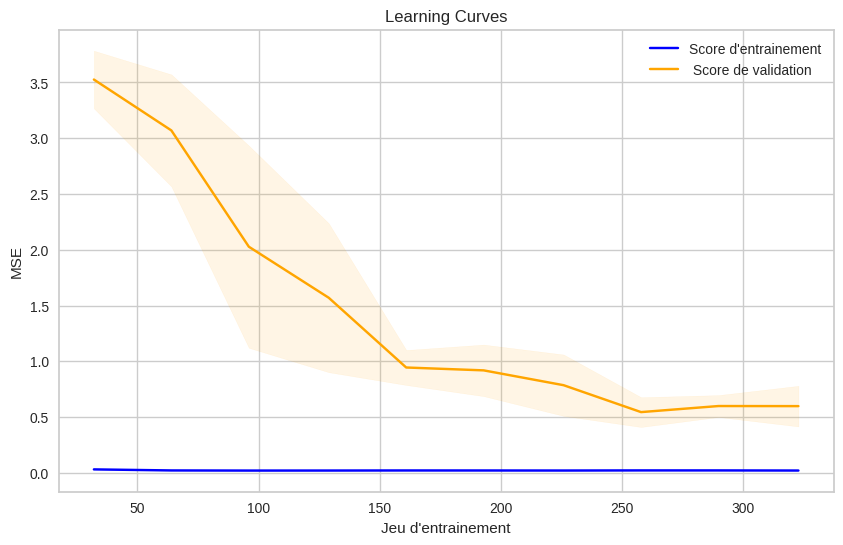

In [18]:
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score d'entrainement", color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, valid_scores_mean, label=' Score de validation', color='orange')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
plt.xlabel("Jeu d'entrainement")
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()
